# Import Necessary Dependency

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
plt.style.use('default')
import cv2
import numpy as np
from imhist import imhist, imcdf
from scipy.fftpack import fft2, ifft2
from skimage import filters
from mpl_toolkits.mplot3d import Axes3D



# Open the image and plot the pixel. 

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 14})  

#Input
Z = imread("Sign3.jpg")

#Basic Image Manipulation
plt.imshow(Z)
plt.show()



In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 14})  

#Input
A = imread("Sign3.png")
C = A
#Basic Image Manipulation
plt.imshow(A)
plt.show()



# Contrast Control, Unused 

Contrast and Brighness value is manipulated here for the Otsu Thresholding. However, it causes more incorrent output.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


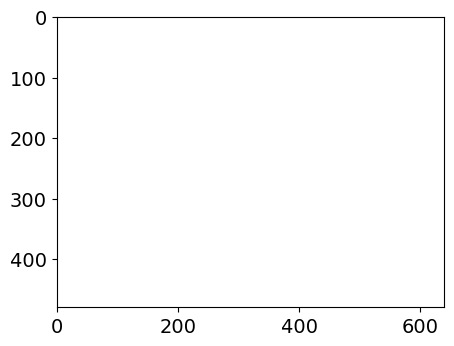

In [6]:
alpha = 1.1
beta = -100
Blured =  cv2.GaussianBlur(A, (5, 5), 0)
D = cv2.addWeighted(Blured,alpha,np.zeros(Blured.shape,Blured.dtype),0,beta)
plt.imshow(D)
plt.show()


# 3D plotlib and  the dynamic range

Multiple Graph has been plotted to visualize the change in data and see if it would affect the RNN in future. The horizontal axis of the graph represents the tonal variations, while the vertical axis represents the total number of pixels in that particular tone.

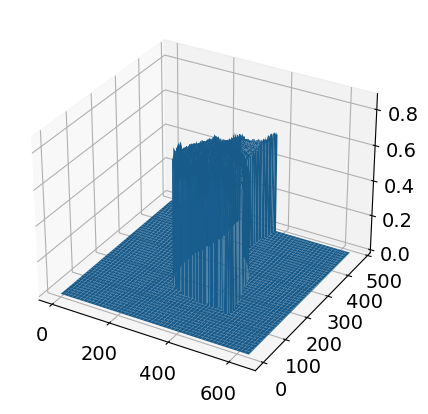

In [7]:
image = C
# Convert the image to grayscale
image = np.mean(image, axis=2)
# Create a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Get the x and y coordinates of the image
X, Y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
# Plot the surface
ax.plot_surface(X, Y, image)
# Show the plot
plt.show()

# Dynamic Range of Image Plotted

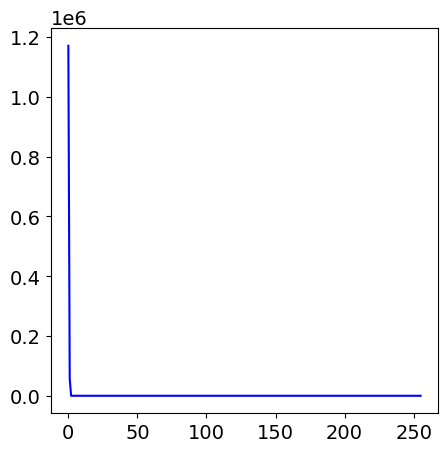

In [8]:
v_hist = imhist(C)
plt.plot(np.arange(256), v_hist, 'b', label='Histogram')
plt.show()

# Gray Scaling the image

Image has been grayscaled at the very begining to make it convenient. 

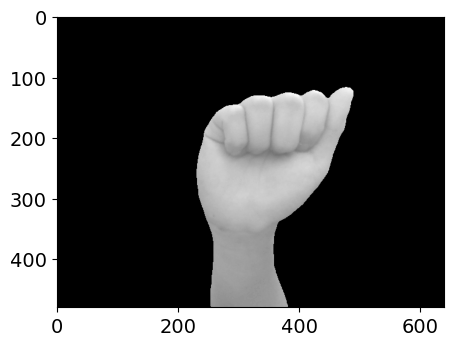

In [9]:

#gray scale
B = np.mean(C,-1)
plt.imshow(B, cmap='gray')
plt.show()


# Otsu's Thresholding, Unused

The output fails to remove background. Different approach/ better implementation required.

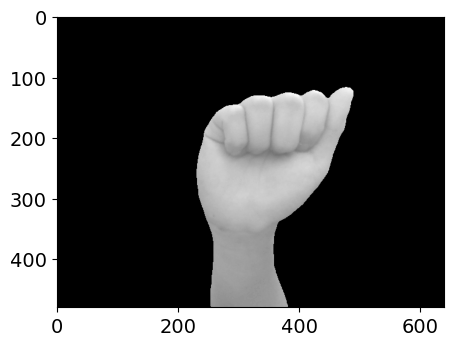

In [10]:
# Load the image
image = B

# Apply Otsu's thresholding
threshold = 125
mask = image > threshold

# Invert the mask to remove the background
mask = np.invert(mask)

# Use the mask to select the background region of the image
background = np.zeros_like(image)
background[mask] = image[mask]

plt.imshow(background, cmap='gray')
plt.show()

# FFT Used

FFT used to compress the image. 20% of the data from the original image has been used only.

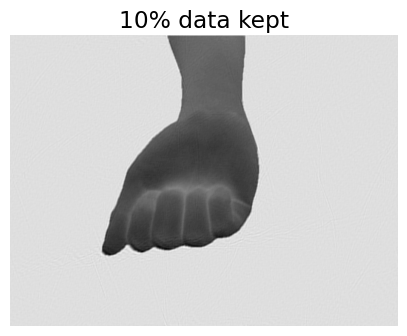

In [11]:
bt = np.fft.fft2(B)
btsort = np.sort(np.abs(bt.reshape(-1)))
#Select the amount od data to be kept
keep = 0.1   
thresh = btsort[int(np.floor((1-keep)*len(btsort)))]
#Find small Indices
ind = np.abs(bt)>thresh
#Threshold small indices
btlow = bt*ind
#Compress the Image
Alow = np.fft.fft2(btlow).real
plt.figure()
E = 256-Alow
plt.imshow(E,cmap ="gray")
plt.axis("off")
plt.title("10% data kept")
plt.show()    

FFT High pass filter applied on the image. This is done to Separate the edges only.

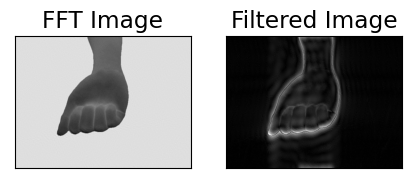

In [12]:
# apply FFT
image = E
# apply FFT
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift) + 1e-16)

# create a high-pass filter
rows, cols = image.shape
crow, ccol = rows//2 , cols//2
f_hpf = np.ones((rows, cols))
f_hpf[crow-2:crow+10, ccol-25:ccol+10] = 0

# apply the filter to the FFT spectrum
filtered_spectrum = fshift * f_hpf

# inverse FFT the filtered spectrum to obtain the filtered image
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_spectrum)))

# plot the results
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('FFT Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtered_image, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

The Histogram has been redrawn based on the new value. Potential for decrease in parameters for RNN

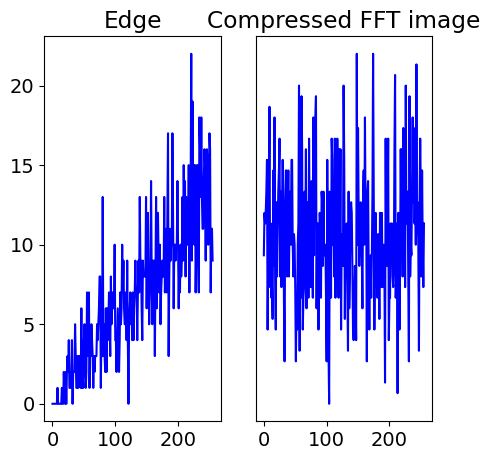

In [13]:
v_hist = imhist(filtered_image)
plt.subplot(121),plt.plot(np.arange(256), v_hist, 'b', label='Histogram')
plt.title('Edge')                                             
                                              
v_hist = imhist(E)
plt.subplot(122),plt.plot(np.arange(256), v_hist, 'b', label='Histogram')
plt.title('Compressed FFT image'),  plt.yticks([])
plt.show()

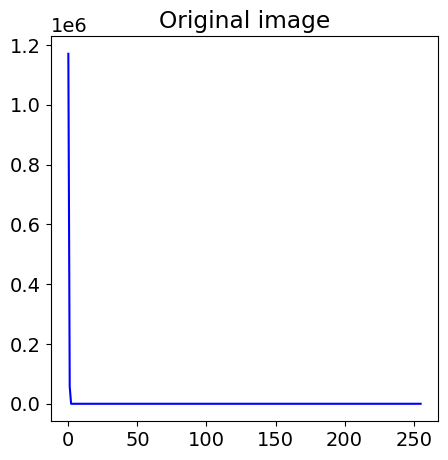

In [14]:
v_hist = imhist(A)
plt.plot(np.arange(256), v_hist, 'b', label='Histogram')
plt.title('Original image')
plt.show()

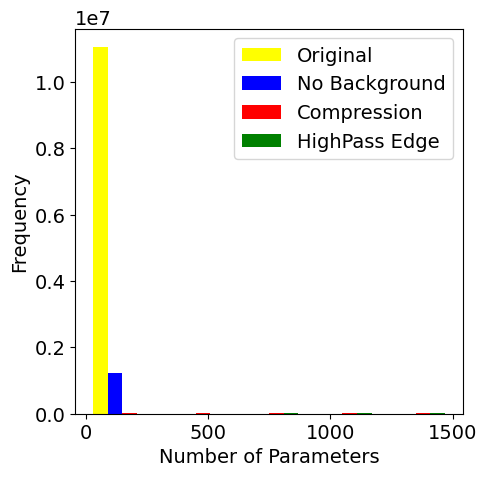

In [15]:
import matplotlib.pyplot as plt

# Example number of parameters for two images
params0 = Z.flatten()
params1 = A.flatten()
params2 = E.flatten()
params3 = filtered_image.flatten()


# Create the histogram
plt.hist([params0, params1, params2, params3], bins=5, range=(0, 1500), color=['Yellow', 'blue', 'red','Green'], label=["Original","No Background", "Compression","HighPass Edge"])
plt.xlabel('Number of Parameters')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [16]:
from PIL import Image
import numpy as np
img = Image.fromarray((filtered_image * 255).astype(np.uint8))

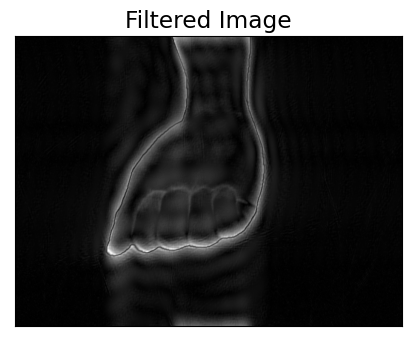

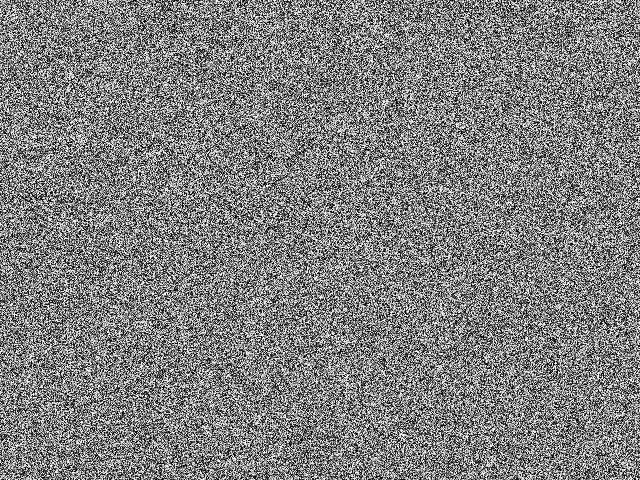

In [17]:

plt.imshow(filtered_image, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()
display(img)

In [ ]:
pip install rembg

In [ ]:
from rembg import remove
from PIL import Image
input_path ='E:\Personal Project\OpenCV\Codes\Sign6.jpg'
output_path = 'E:\Personal Project\OpenCV\Codes\pakhicharakichunai.png'
input = Image.open(input_path)
output = remove (input)
output.save(output_path)